Momento de Retroalimentación: Módulo 2 Implementación de un modelo de deep learning.

Importamos las librerías necesarias.

In [153]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Para este ejercicio trabajaremos con el dataset de Paris Housing Classification obtenido de https://www.kaggle.com/datasets/mssmartypants/paris-housing-classification y que consiste de la información de precios y características de propiedades en Paris junto a si son consideradas como casas "normales" o "de lujo". Así que supongamos que somos un compañía de bienes raíces que quiere crear un modelo que nos ayude a predecir si las propiedades que vamos a adquirir son de lujo, obteniendo un valor numérico de "lujosidad" a partir de las características de la propiedad.

También se utilizaran las funciones de train_test_split y el scaler para facilitar el preprocesamiento de datos.

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importamos los datos.

In [155]:
housing = pd.read_csv("ParisHousingClass.csv")

In [156]:
housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


Vamos a substituir los strings de la columna `category` por valores numéricos equivalentes.
Basic = 1
Luxury = 2

In [157]:
housing.loc[housing["category"] == "Basic", "category"] = 1
housing.loc[housing["category"] == "Luxury", "category"] = 2

In [158]:
housing.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,1
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,2
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,1
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,2


Y luego convertir el datatype de esa columna a uno numérico.

In [159]:
housing = housing.astype({'category':'int'})

Ahora vamos a separar el dataframe en datos de entrada y de salida.

In [160]:
y = housing['category']
X = housing.drop(columns=['category'])

Y luego vamos a separar los datos entre train y test.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Hacemos otro split sobre los datos de train para obtener datos de validación

In [162]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

Ahora escalaremos los datos haciendo uso del StandardScaler de sklearn.

In [163]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Ahora creamos el modelo usando un objeto `Sequential()` de keras.
Le añadiremos un capa densa de 30 neuronas con función de activación relu y una capa de dos neuronas que servira como salida ya que se está intentado predecir un valor categórico con dos valores posibles.

In [164]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(2))

Se compila el modelo con un optimizador de gradiente descendiente.

In [165]:
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])

Se hace fit con los datos y se entrena el modelo.

In [166]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
176/176 [==============================] - 1s 4ms/step - loss: 0.2742 - accuracy: 0.4226 - val_loss: 0.1560 - val_accuracy: 0.4565
Epoch 2/20
176/176 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.4484 - val_loss: 0.1081 - val_accuracy: 0.4379
Epoch 3/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.4444 - val_loss: 0.0883 - val_accuracy: 0.4272
Epoch 4/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0786 - accuracy: 0.4425 - val_loss: 0.0757 - val_accuracy: 0.4272
Epoch 5/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.4373 - val_loss: 0.0666 - val_accuracy: 0.4331
Epoch 6/20
176/176 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.4373 - val_loss: 0.0590 - val_accuracy: 0.4373
Epoch 7/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.4402 - val_loss: 0.0531 - val_accuracy: 0.4416
Epoch 

Graficamos los resultados con matplotlib

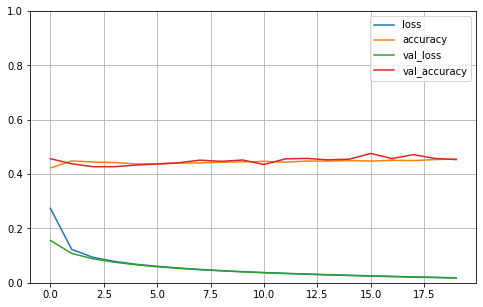

In [167]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Como se puede ver el loss se va reduciendo conforme pasan las epochs de entrenamiento.

Con esto modelo podemos hacer predicciones, en este caso reutilizaremos 3 datos del dataset de entrenamiento.

In [168]:
mse_test = model.evaluate(X_test, y_test)
mse_test

79/79 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.4460


[0.018976205959916115, 0.44600000977516174]

In [169]:
X_dummy = X_test[:3]
y_pred = model.predict(X_dummy)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[1.0233643 , 1.0330253 ],
       [0.9867048 , 1.01248   ],
       [0.7068348 , 0.79675555]], dtype=float32)

Mejorando el modelo

Intentaremos hacer que la última capa del modelo solo tenga una neurona para ver si esto mejora el accuracy del modelo. Podemos pensar que en vez de intentar predecir un valor categórico vamos a intentar predecir un valor numérico de "lujosidad".

In [170]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model2.add(keras.layers.Dense(1))

In [171]:
model2.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])

In [172]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
176/176 [==============================] - 2s 8ms/step - loss: 0.3106 - accuracy: 0.7582 - val_loss: 0.1163 - val_accuracy: 0.8437
Epoch 2/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.8660 - val_loss: 0.0820 - val_accuracy: 0.8635
Epoch 3/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.8738 - val_loss: 0.0669 - val_accuracy: 0.8651
Epoch 4/20
176/176 [==============================] - 0s 3ms/step - loss: 0.0626 - accuracy: 0.8754 - val_loss: 0.0573 - val_accuracy: 0.8672
Epoch 5/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0541 - accuracy: 0.8763 - val_loss: 0.0507 - val_accuracy: 0.8677
Epoch 6/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.8766 - val_loss: 0.0452 - val_accuracy: 0.8677
Epoch 7/20
176/176 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.8766 - val_loss: 0.0409 - val_accuracy: 0.8677
Epoch 

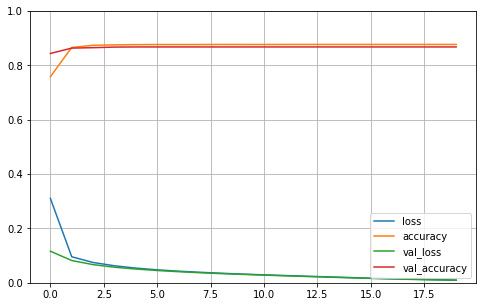

In [173]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Como se puede ver el accuracy del modelo se logró aumentar considerablemente.

Ahora haremos nuevas predicciones con el nuevo modelo.

In [174]:
mse_test2 = model2.evaluate(X_test, y_test)
mse_test2

79/79 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.8700


[0.009672031737864017, 0.8700000047683716]

In [175]:
X_dummy2 = X_test[:3]
y_pred2 = model2.predict(X_dummy2)
y_pred2

1/1 [==============================] - 0s 53ms/step


array([[1.1119523],
       [1.0183048],
       [0.9648964]], dtype=float32)